In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn


print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))


Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [3]:
fname= 'TAPE2_output_sheet.xlsx'
df = pd.read_excel(fname)
print(df)

      Unnamed: 0                       Filename   V0   V1   V2  Phi2 1D_label  \
0              0  V0_1.6_V1_075_V2_0.8_Phi2_+10  1.6   75  0.8    10    Focus   
1              1  V0_1.6_V1_075_V2_0.8_Phi2_+20  1.6   75  0.8    20    Focus   
2              2  V0_1.6_V1_075_V2_0.8_Phi2_+30  1.6   75  0.8    30    Focus   
3              3  V0_1.6_V1_075_V2_1.0_Phi2_+10  1.6   75  1.0    10    Focus   
4              4  V0_1.6_V1_075_V2_1.0_Phi2_+20  1.6   75  1.0    20    Focus   
...          ...                            ...  ...  ...  ...   ...      ...   
1795        1795  V0_6.0_V1_150_V2_3.0_Phi2_+20  6.0  150  3.0    20    Focus   
1796        1796  V0_6.0_V1_150_V2_3.0_Phi2_+30  6.0  150  3.0    30    Focus   
1797        1797  V0_6.0_V1_150_V2_4.0_Phi2_+10  6.0  150  4.0    10    Focus   
1798        1798  V0_6.0_V1_150_V2_4.0_Phi2_+20  6.0  150  4.0    20    Focus   
1799        1799  V0_6.0_V1_150_V2_4.0_Phi2_+30  6.0  150  4.0    30    Focus   

     2D_label  
0       Foc

In [4]:
#preprocess the data
print(df.columns)
print(df.axes)





#drops the unnecessary columns
df.drop(['Unnamed: 0'],1, inplace= True)
df.drop(['Filename'], 1, inplace=True)
df.drop(['1D_label'], 1, inplace=True)


#dropping of Nulls (dropping for now)
#converting Focused (1) or defocused (0) to binary classification


Index(['Unnamed: 0', 'Filename', 'V0', 'V1', 'V2', 'Phi2', '1D_label',
       '2D_label'],
      dtype='object')
[RangeIndex(start=0, stop=1800, step=1), Index(['Unnamed: 0', 'Filename', 'V0', 'V1', 'V2', 'Phi2', '1D_label',
       '2D_label'],
      dtype='object')]


In [5]:
print(df.axes)

[RangeIndex(start=0, stop=1800, step=1), Index(['V0', 'V1', 'V2', 'Phi2', '2D_label'], dtype='object')]


In [6]:
#dataset visualizations
print(df.loc[482]) # can see the data for one specific point
print(df.describe()) # gives us the mean, standard deviation, percentiles for each paramater in the dataset

V0           3.2
V1            75
V2           0.8
Phi2          30
2D_label    Null
Name: 482, dtype: object
                V0           V1           V2         Phi2
count  1800.000000  1800.000000  1800.000000  1800.000000
mean      3.793333   110.000000     2.160000    20.000000
std       1.083793    23.324928     1.209633     8.167235
min       1.600000    75.000000     0.800000    10.000000
25%       3.000000    92.500000     1.000000    10.000000
50%       3.800000   110.000000     2.000000    20.000000
75%       4.400000   126.250000     3.000000    30.000000
max       6.000000   150.000000     4.000000    30.000000


In [7]:
# Parse data into focus and de-focus
df
#focus = df[df['2D_label'] == 'Focus']
#defocus = df[df['2D_label'] == 'Defocus']
df =  df[df['2D_label'] != 'Null']
df

,V0,V1,V2,Phi2,2D_label
0,1.6,75,0.8,10,Focus
1,1.6,75,0.8,20,Focus
2,1.6,75,0.8,30,Focus
3,1.6,75,1.0,10,Focus
4,1.6,75,1.0,20,Focus
...,...,...,...,...,...
1795,6.0,150,3.0,20,Focus
1796,6.0,150,3.0,30,Focus
1797,6.0,150,4.0,10,Focus
1798,6.0,150,4.0,20,Focus


In [8]:
#checks to see if there is any missing data
df.isnull().sum()

V0          0
V1          0
V2          0
Phi2        0
2D_label    0
dtype: int64

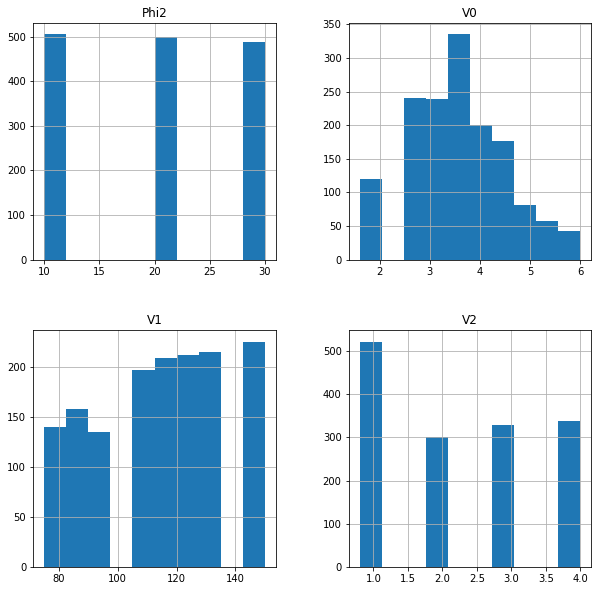

In [9]:
df.hist(figsize=(10,10))
plt.show()

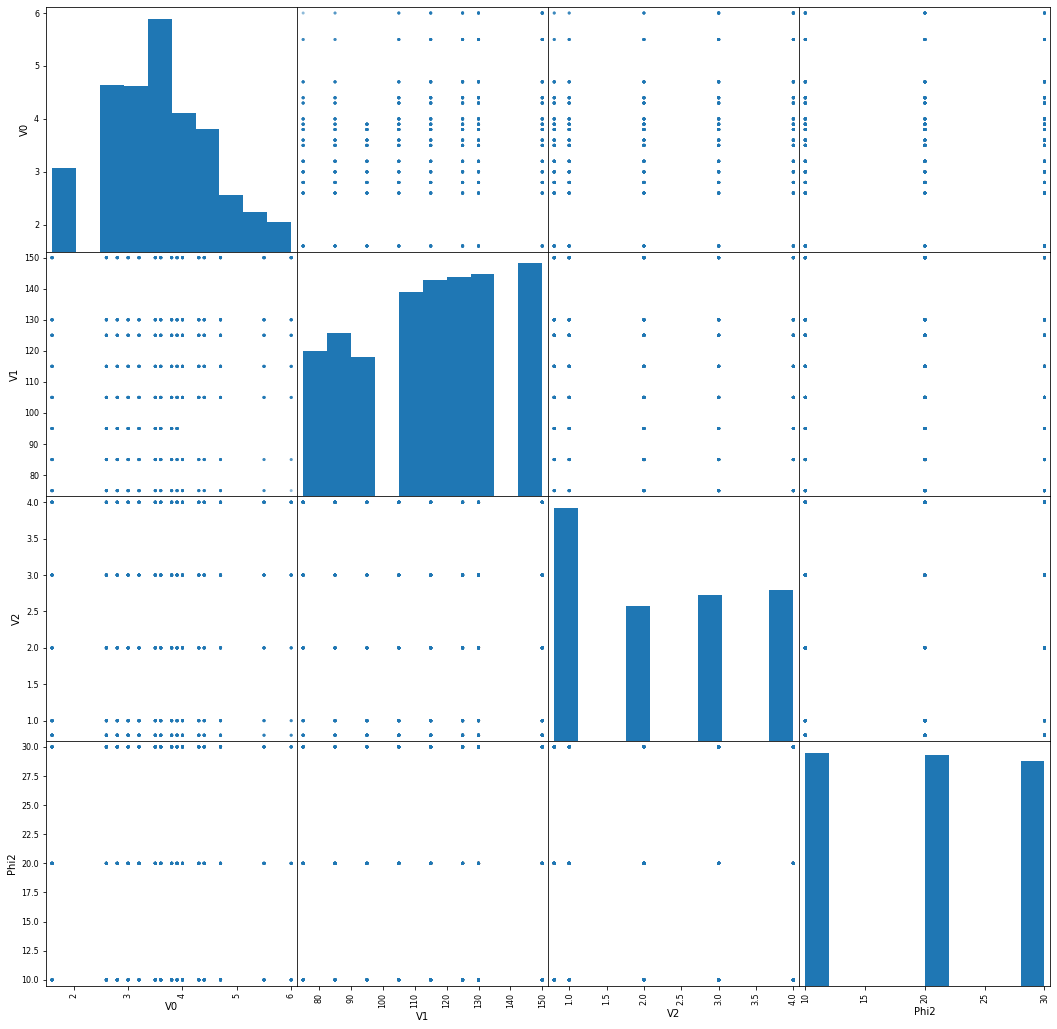

In [10]:
#create scatterplot matrix
scatter_matrix(df, figsize= (18,18))
plt.show() #relationship with each variable in relation to every other variable


In [11]:
#create X and y datasets for training
print(df.axes)
X=np.array(df.drop(['2D_label'],1 ))
y=np.array(df['2D_label'])


[Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799],
           dtype='int64', length=1491), Index(['V0', 'V1', 'V2', 'Phi2', '2D_label'], dtype='object')]


In [12]:
#scales the data/ Regularize
scaler=StandardScaler()
x_std=scaler.fit_transform(X)

print(x_std)
print(X)
print(y)

#split the data
X_train, X_test, y_train, y_test = train_test_split(x_std, y, test_size=0.2)

[[-2.00785352 -1.69315703 -1.22801206 -1.211311  ]
 [-2.00785352 -1.69315703 -1.22801206  0.01480217]
 [-2.00785352 -1.69315703 -1.22801206  1.24091534]
 ...
 [ 2.50553426  1.57974332  1.40955485 -1.211311  ]
 [ 2.50553426  1.57974332  1.40955485  0.01480217]
 [ 2.50553426  1.57974332  1.40955485  1.24091534]]
[[  1.6  75.    0.8  10. ]
 [  1.6  75.    0.8  20. ]
 [  1.6  75.    0.8  30. ]
 ...
 [  6.  150.    4.   10. ]
 [  6.  150.    4.   20. ]
 [  6.  150.    4.   30. ]]
['Focus' 'Focus' 'Focus' ... 'Focus' 'Focus' 'Focus']


In [13]:
#Testing options
seed= 1
scoring= 'accuracy'


In [14]:
#Define models to train
models=[]
models.append(('KNN', KNeighborsClassifier(n_neighbors = 3)))  #can play around this number to maximize Cv accuracy
models.append(('SVM Linear Kernel',SVC(kernel='linear'))) # Changing C doesn't alter much
models.append(('SVM poly_Kernel degree 2',SVC(kernel='poly', degree=2)))
models.append(('SVM poly_Kernel degree 3',SVC(kernel='poly', degree=3)))
models.append(('SVM poly_Kernel degree 4',SVC(kernel='poly', degree=4)))
models.append(('SVM poly_Kernel degree 5',SVC(kernel='poly', degree=5)))
models.append(('SVM poly_Kernel degree 6',SVC(kernel='poly', degree=6)))
models.append(('SVM Gaussian Kernel w/ high C',SVC(kernel='rbf', C=1E7))) #can delete C but tracking accuracy for hard margin before ~91% accuracy
models.append(('SVM Gaussian Kernel w/ no C',SVC(kernel='rbf')))

from sklearn.ensemble import RandomForestClassifier
models.append(('RFC', RandomForestClassifier(n_estimators=1000)))

from sklearn.ensemble import ExtraTreesClassifier
models.append(('ExtraTrees', ExtraTreesClassifier(n_estimators=1000)))
#could add more models in sklearn


#evaluate each model in turn
results = []
names= []
print("cross validation accuracy and std")
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(name)
    names.append(name)
    msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

cross validation accuracy and std
KNN: 0.932024 (0.023020)
SVM Linear Kernel: 0.925336 (0.018522)
SVM poly_Kernel degree 2: 0.663550 (0.041789)
SVM poly_Kernel degree 3: 0.876625 (0.031323)
SVM poly_Kernel degree 4: 0.666905 (0.051388)
SVM poly_Kernel degree 5: 0.840553 (0.032722)
SVM poly_Kernel degree 6: 0.669440 (0.036388)
SVM Gaussian Kernel w/ high C: 0.939573 (0.024602)
SVM Gaussian Kernel w/ no C: 0.917787 (0.025310)
RFC: 0.968095 (0.016292)
ExtraTrees: 0.966429 (0.018036)


In [15]:
#Make predictions on test dataset
for name, model in models:
    model.fit(X_train, y_train) #trains model on training data
    predictions= model.predict(X_test) #predicts on the Xtest
    print(name)
    print(accuracy_score(y_test, predictions)) 
    print(classification_report(y_test, predictions))

 # Accuracy - ratio of correctly predicted observation to the total observations. 
# Precision - (false positives) ratio of correctly predicted positive observations to the total predicted positive observations
# Recall (Sensitivity) - (false negatives) ratio of correctly predicted positive observations to the all observations in actual class - yes.
# F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false 

KNN
0.9431438127090301
              precision    recall  f1-score   support

     Defocus       0.95      0.89      0.92       108
       Focus       0.94      0.97      0.96       191

    accuracy                           0.94       299
   macro avg       0.94      0.93      0.94       299
weighted avg       0.94      0.94      0.94       299

SVM Linear Kernel
0.9163879598662207
              precision    recall  f1-score   support

     Defocus       0.94      0.82      0.88       108
       Focus       0.91      0.97      0.94       191

    accuracy                           0.92       299
   macro avg       0.92      0.90      0.91       299
weighted avg       0.92      0.92      0.92       299

SVM poly_Kernel degree 2
0.6387959866220736
              precision    recall  f1-score   support

     Defocus       0.00      0.00      0.00       108
       Focus       0.64      1.00      0.78       191

    accuracy                           0.64       299
   macro avg       0.32 

C:\Users\rradawiec\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM poly_Kernel degree 6
0.6354515050167224
              precision    recall  f1-score   support

     Defocus       0.48      0.13      0.20       108
       Focus       0.65      0.92      0.76       191

    accuracy                           0.64       299
   macro avg       0.57      0.53      0.48       299
weighted avg       0.59      0.64      0.56       299

SVM Gaussian Kernel w/ high C
0.9565217391304348
              precision    recall  f1-score   support

     Defocus       0.94      0.94      0.94       108
       Focus       0.96      0.97      0.97       191

    accuracy                           0.96       299
   macro avg       0.95      0.95      0.95       299
weighted avg       0.96      0.96      0.96       299

SVM Gaussian Kernel w/ no C
0.9264214046822743
              precision    recall  f1-score   support

     Defocus       0.97      0.82      0.89       108
       Focus       0.91      0.98      0.94       191

    accuracy                           0.9

In [16]:
#example of predicting based off of features

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
accuracy= clf.score(X_test, y_test)
print(accuracy)

example= np.array([[4,110,2,20]])
example=example.reshape(len(example), -1) #turns it into a column vector
prediction=clf.predict(example)
print(prediction)


0.9698996655518395
['Focus']


In [17]:
#Algorithms
#In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

In [18]:

#Binary classification
renamed2d= df.rename(columns = {'2D_label':'label'}, inplace = True) 
label={'Defocus':0, 'Focus':1}
df.label= [label[item] for item in df.label]
print(df)



       V0   V1   V2  Phi2  label
0     1.6   75  0.8    10      1
1     1.6   75  0.8    20      1
2     1.6   75  0.8    30      1
3     1.6   75  1.0    10      1
4     1.6   75  1.0    20      1
...   ...  ...  ...   ...    ...
1795  6.0  150  3.0    20      1
1796  6.0  150  3.0    30      1
1797  6.0  150  4.0    10      1
1798  6.0  150  4.0    20      1
1799  6.0  150  4.0    30      1

[1491 rows x 5 columns]


(1491, 3)
(1491,)


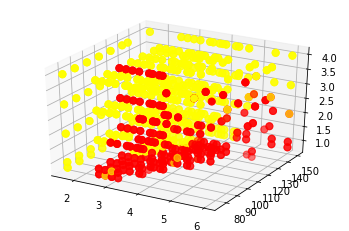

In [19]:
#plot data points and color using their class
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
#color = ['Black' if df.label==1]

#define new axes to plot just V0 and V1 for now and drop phi2  andV2
X=(df.drop(['label'],1 ))
X=(X.drop(['Phi2'],1 ))
#X=(X.drop(['V1'],1 ))
#y=np.array(df['label'])
y=df['label']


#turns data into a numpy array
X=np.array(X)
Y=np.array(y)


#print(X.axes)
print(X.shape)
#print(X)
print(y.shape)

#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


#3d Plot!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y, s=50, cmap='autumn');


In [20]:

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1)
#model=SVC(kernel='rbf', C=1E4)
clf=model.fit(X, Y)


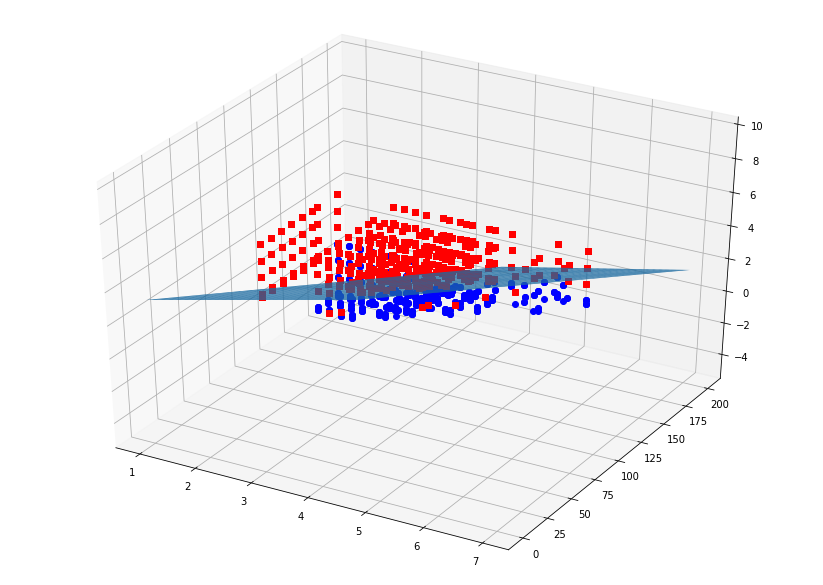

In [21]:
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)

from matplotlib.pyplot import figure
%matplotlib inline
#%matplotlib notebook

z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmpx = np.linspace(1,7,30)
tmpy= np.linspace(0,200,30)
x,y = np.meshgrid(tmpx,tmpy)
fig = plt.figure()

fig.set_size_inches(14.5, 10.5)

ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
ax.plot_surface(x, y, z(x,y))
ax.view_init(35, 300)
plt.show()
# rotate the axes and update



#


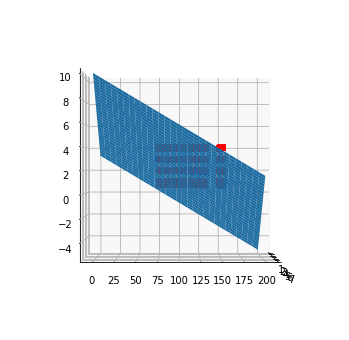

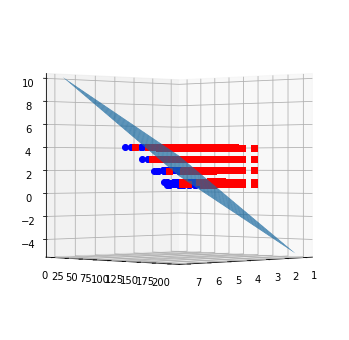

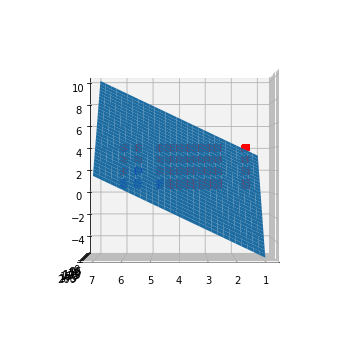

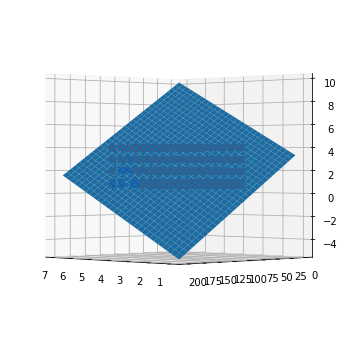

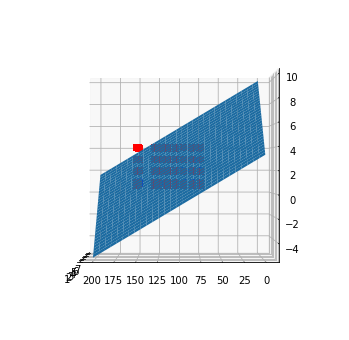

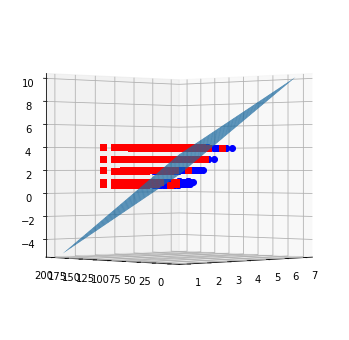

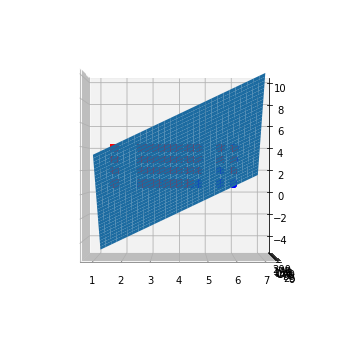

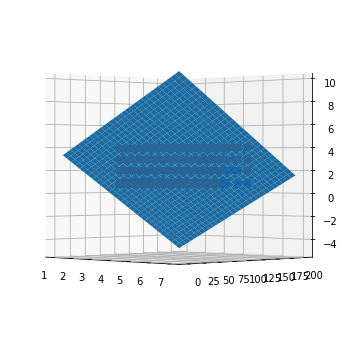

In [22]:
#roate around the y axis

i=0
j=0
while j < 8:
    while i<8:


        fig = plt.figure()

        fig.set_size_inches(6, 6)

        ax = fig.add_subplot(111, projection='3d')
        ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
        ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
        ax.plot_surface(x, y, z(x,y))
        ax.view_init(j*45, i*45)
        plt.show()
        i=i+1
    j=j+1

In [23]:
#Finds the slope of the decision boundary


#print(z(x,y)) #try to find slope of decision boundary to color in background base don slope
#print(-clf.coef_[0][0]/ clf.coef_[0][2]) #x slope
#print(-clf.coef_[0][1]/ clf.coef_[0][2]) #yslope
#print(-clf.intercept_[0]) # constant that is added
y_slope=(-clf.coef_[0][1]/ clf.coef_[0][2])
x_slope=(-clf.coef_[0][0]/ clf.coef_[0][2])
b=(-clf.intercept_[0])
msg= " z = %f *x + %f * y + %f " % (x_slope, y_slope, b)
print(msg)
#x=V0?
#y=V1?
#Z=v2?

 z = 1.130740 *x + -0.042689 * y + 3.777895 
